# Normal Distribution

### Task: Create a notebook about the normal distribution. Define and explain the main concepts. Pitch the notebook at your classmates. Use visuals like plots to explain concepts.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

“A normal distribution is sometimes informally called a bell curve.[4] However, many other distributions are bell-shaped (such as the Cauchy, Student's t, and logistic distributions). For other names, see Naming.” - https://en.wikipedia.org/wiki/Normal_distribution

Stats by Jim also contains a section called “Population Parameters Versus Sample Estimates”, which is an explanation of the fact that you can’t always know the exact mean or standard deviation, meaning you have to estimate these. From this you can go into a section on Bessel’s correction?

Watch the examples below to get an idea of how they are introducing various concepts and when, see if there are any 

https://www.youtube.com/watch?v=xI9ZHGOSaCg

https://www.investopedia.com/terms/n/normaldistribution.asp

## Definition

![image](..\materials\normal-pdf-cdf.png)

Above, from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution), four different plots of normally-distributed data, with differing values for the <i>mean</i> (signified by the $\mu$ symbol) and the <i>standard variation</i> (signified by the $\sigma^2$ symbol).
- it's probably worth attempting to recreate the examples in the pdf to take people through the concepts 

“The graph of the normal distribution is characterized by two parameters: the mean, or average, which is the maximum of the graph and about which the graph is always symmetric; and the standard deviation, which determines the amount of dispersion away from the mean” - https://www.britannica.com/topic/normal-distribution - after this quote go into parameters section

basically the normal distribution assigns values equally either side of the mean, ensuring that the curve itself is symmetrical, and peaking at the mean.

"The mean, median, and mode are all equal. Half of the population is less than the mean and half is greater than the mean." - Frost, 2018)

“While the normal distribution is symmetrical, not all symmetrical distributions are normal. For example, the Student’s t, Cauchy, and logistic distributions are symmetric.” - https://statisticsbyjim.com/basics/normal-distribution/

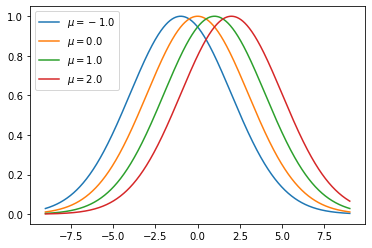

In [2]:
# plot a basic norm dist here, below is Ian's example

# Changing values of mu.
# The mu again represents the mean, this is why in numpy the particular parameter is called the loc, for location

# Set some initial values, we'll ignore this mu.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of mu.
for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

# Add a legend.
plt.legend();

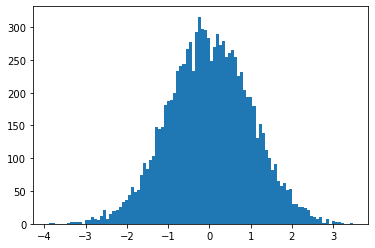

In [3]:
# another of Ian's examples

rng = np.random.default_rng(0)
samples = rng.standard_normal(10000)
# the numbers generated will be written using exponential notation, which means that if the last digit is a -01
# then you move the decimal place 1 digit to the left, and if it's +00 then it stays where it is.
# i.e 9.9900969e-01 becomes 0.9900969.

fig, ax = plt.subplots()
# you can use the bins parameter to further segment the number of bars that are displayed
ax.hist(samples, bins=100)
plt.show()

## Explanation of density function

$$f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

## Parameters
- explain mean - Display the operation of the normal distribution but displaying multiple distributions on the same plot, but changing the mean and standard deviation accordingly 
- explain standard deviation

## The Central Limit Theorem

https://www.youtube.com/watch?v=YAlJCEDH2uY

https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm - there are some good comments at the end of this article around why it is popular, and about how the central limit theorem proves it. This was mentioned in the EncycBrit article.

## Use Cases

"Its familiar bell-shaped curve is ubiquitous in statistical reports, from survey analysis and quality control to resource allocation." - (Augustyn, 2022)

Mention something about ubiquity of normal distribution, and funnily enough, this advert came up while I was researching at https://statisticsbyjim.com/basics/normal-distribution/:

![image](norm-dist-ad.png)

in the above, we can see that 96% of the results fall within 2 standard deviations of the mean, this is true of all normally-distributed data

Male heights: plot these https://www.youtube.com/watch?v=rzFX5NWojp0
baby stddev 0.6, mean 20 inches, adult stddev 4, mean 70 inches, this means that 95% of male heights fall within 8 inches of the average